In [102]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [3]:
df=pd.read_csv(r"F:\Course\Natural Language Processing with Python\1. Introduction\UPDATED_NLP_COURSE\TextFiles\smsspamcollection.tsv", sep='\t')

In [10]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
df.drop(labels=['punct'], axis=1, inplace=True)

KeyError: "['punct'] not found in axis"

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
label      5572 non-null category
message    5572 non-null object
length     5572 non-null int64
dtypes: category(1), int64(1), object(1)
memory usage: 92.7+ KB


In [18]:
df.label=df.label.astype('category')

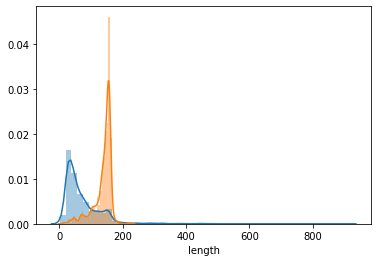

In [24]:
sns.distplot(df.loc[df.label=='ham','length'])
sns.distplot(df.loc[df.label=='spam','length'])

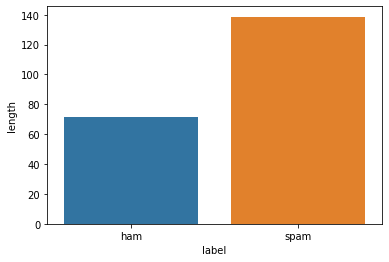

In [26]:
sns.barplot(df.label, df.length, ci=None)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
vec=TfidfVectorizer()

In [29]:
from sklearn.model_selection import train_test_split

In [39]:
X=df.loc[:,'message']
y=df.loc[:,'label']

In [40]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [41]:
from sklearn.pipeline import Pipeline

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
glm=LogisticRegression()

In [36]:
steps=[('vec',vec),('glm',glm)]

In [37]:
pipe=Pipeline(steps)

In [42]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vec',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('glm',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1

In [44]:
from sklearn.metrics import classification_report, roc_auc_score

In [45]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1593
        spam       0.99      0.80      0.88       246

    accuracy                           0.97      1839
   macro avg       0.98      0.90      0.93      1839
weighted avg       0.97      0.97      0.97      1839



In [46]:
print(roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1]))

0.9900862002970312


In [50]:
pipe.predict(['Congratulations you have WON FREE $600000. Please follow the link to know more, https://hacked.com'])

array(['spam'], dtype=object)

In [93]:
for i in range(0, len()):
    # column : "Review", row ith 
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    
    # convert all cases to lower cases 
    review = review.lower()
    
    # split to array(default delimiter is " ") 
    review = review.split()
    
    # creating PorterStemmer object to take main stem of each word 
    ps = PorterStemmer()
    
    # loop for stemming each word in string array at ith row 
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    
    # rejoin all string array elements to create back into a string 
    review = ' '.join(review)
    corpus.append(review)

0           0
1            
4      jurong
5       point
6           ,
        ...  
151      5572
152         ,
153     dtype
154         :
155    object
Name: words, Length: 117, dtype: object

In [94]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [100]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bishw\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [96]:
from nltk.stem.snowball import SnowballStemmer

In [97]:
snb=SnowballStemmer(language='english')

In [99]:
df.columns

Index(['label', 'message', 'length'], dtype='object')

In [104]:
bow=[]
for i in range(0,len(df)):
    msg = re.sub('[^a-zA-Z]', ' ', df['message'][i])
    msg = msg.lower()
    msg = msg.split()
    msg = [snb.stem(word) for word in msg if not word in set(stopwords.words('english'))]
    msg = ' '.join(msg)
    bow.append(msg)

In [ ]:
bow_df=pd.DataFrame(bow)

bow_df.columns=['message']

bow_df

In [120]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lem = WordNetLemmatizer()
bow_df['message'] = bow_df.apply(lambda row: lem.lemmatize(row['message']),axis = 1)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bishw\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [124]:
cleaned_df=pd.concat([bow_df, df.label], axis=1)

In [125]:
X=cleaned_df.loc[:,'message']
y=cleaned_df.loc[:,'label']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

glm=LogisticRegression()

steps=[('vec',vec),('glm',glm)]

pipe=Pipeline(steps)

pipe.fit(X_train, y_train)

from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, pipe.predict(X_test)))

print(roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1]))

pipe.predict(['Congratulations you have WON FREE $600000. Please follow the link to know more, https://hacked.com'])

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1593
        spam       0.97      0.76      0.85       246

    accuracy                           0.97      1839
   macro avg       0.97      0.88      0.92      1839
weighted avg       0.97      0.97      0.96      1839

0.9898922623877839


array(['ham'], dtype=object)